In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest,f_oneway
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [134]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Dropping 'host_name' column, since it is not useful for data analysis 

In [3]:
data = data.dropna(subset=['name'])
data = data.drop(columns=['host_name'])

In [137]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
null_data = data[data['reviews_per_month'].isnull()]
null_data.head(2)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249


In [139]:
null_data['number_of_reviews'].value_counts()

0    10042
Name: number_of_reviews, dtype: int64

'last_review' and 'reviews_per_month' columns have common rows of null values. And their correspnding 'number_of_reviews' is also zero. So, that means there are no reviews for that instance at all, hence can be filled with zero.

In [140]:
data.duplicated().sum()

0

There are no duplicate instances in the data.

In [5]:
data = data.drop(columns=['id','last_review'])

In [6]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(value=0)

In [7]:
hosts = data['host_id'].value_counts().reset_index()[:10]

In [9]:
plt.rcParams['figure.figsize'] = (10,8)

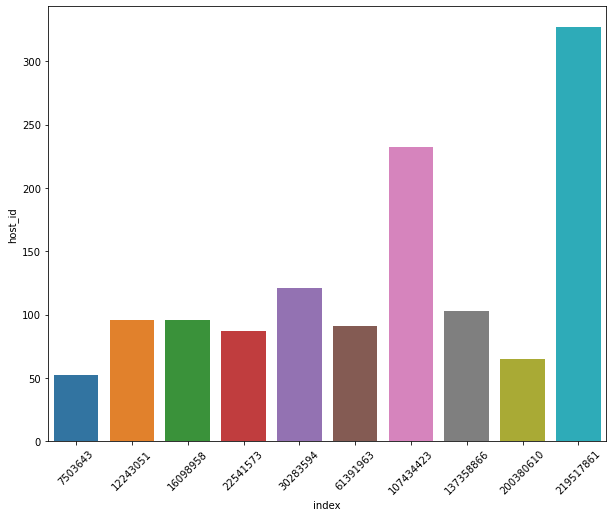

In [145]:
ax = sns.barplot(x='index',y='host_id',data=hosts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Number of instances greater than 2000 -  86


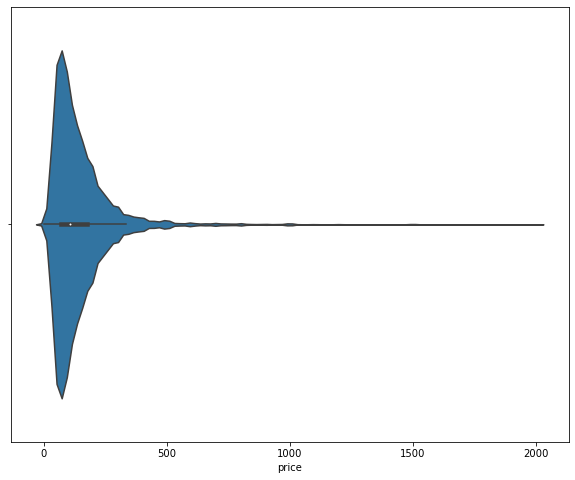

In [146]:
print(f'Number of instances greater than 2000 - ',len(data[data['price']>2000]))
sns.violinplot(data[data['price']<2000]['price'])
plt.show()

Most properties have prices below 500. <br>
Since we are unable to see the most concentrated regions, taper off instances with price > 1000 for visualization purpose

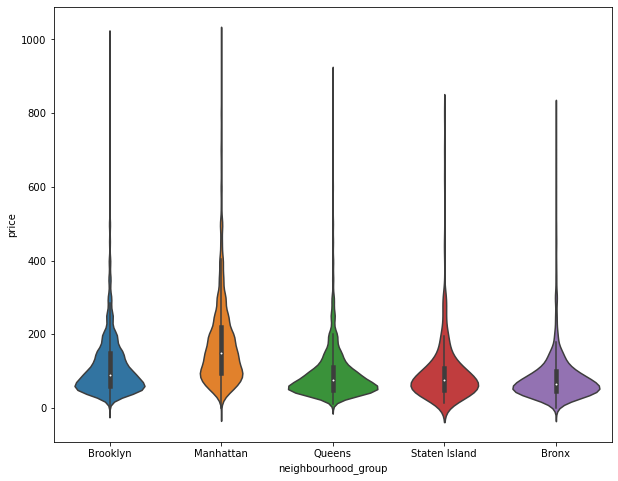

In [147]:
sample_data = data[data['price']<1000]
sns.violinplot(x='neighbourhood_group', y='price', data=sample_data)
plt.show()

In [148]:
neighbour = data.groupby('neighbourhood_group')['price']
brooklyn = neighbour.get_group('Brooklyn')
manhattan = neighbour.get_group('Manhattan')
queens = neighbour.get_group('Queens')
staten = neighbour.get_group('Staten Island')
bronx = neighbour.get_group('Bronx')

In [149]:
for i in [brooklyn,manhattan,queens,staten,bronx]:
    print(normaltest(i))

NormaltestResult(statistic=47254.035706922776, pvalue=0.0)
NormaltestResult(statistic=42857.04730449173, pvalue=0.0)
NormaltestResult(statistic=16395.222258741243, pvalue=0.0)
NormaltestResult(statistic=790.3897629619931, pvalue=2.3390725718221525e-172)
NormaltestResult(statistic=1988.4980173255185, pvalue=0.0)


In [150]:
f_oneway(brooklyn,manhattan,queens,staten,bronx)

F_onewayResult(statistic=354.7510450326817, pvalue=1.2437256616964665e-301)

p_value < 0.05, So we reject null hypothesis.
Since, each group is statistically different, this feature is useful 

Clearly manhattan has higher prices followed by Brooklyn.

In [151]:
samp1 = data['neighbourhood'].value_counts().reset_index()
len(samp1[samp1['neighbourhood']>100])

65

In [152]:
data['room_type'].value_counts()

Entire home/apt    25402
Private room       22318
Shared room         1159
Name: room_type, dtype: int64

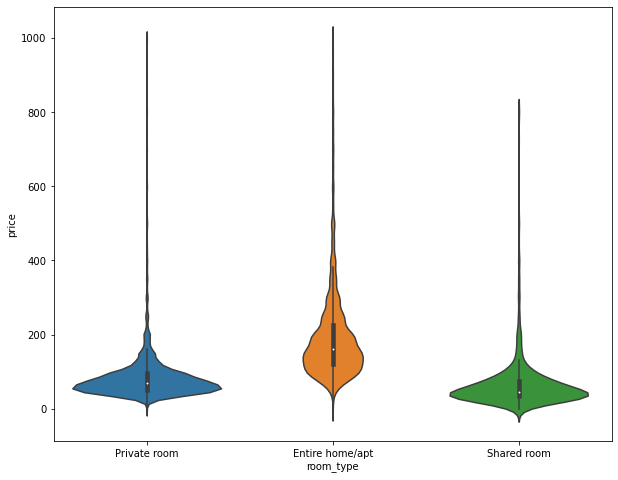

In [153]:
sns.violinplot(x='room_type', y='price', data=sample_data)
plt.show()

In [154]:
room = data.groupby('room_type')['price']
private = room.get_group('Private room')
entire = room.get_group('Entire home/apt')
shared = room.get_group('Shared room')

In [155]:
for i in [private,entire,shared]:
    print(normaltest(i))

NormaltestResult(statistic=60988.450055623536, pvalue=0.0)
NormaltestResult(statistic=50895.132006034815, pvalue=0.0)
NormaltestResult(statistic=1727.324856640638, pvalue=0.0)


In [156]:
f_oneway(private,entire,shared)

F_onewayResult(statistic=1715.297071983644, pvalue=0.0)

p_value < 0.05, So we reject null hypothesis.
Since, each group is statistically different, this feature is useful 

Prices of Entire home/apt is more and shared rooms have less cost, which is expected.

Number of instances greater than 50 -  452


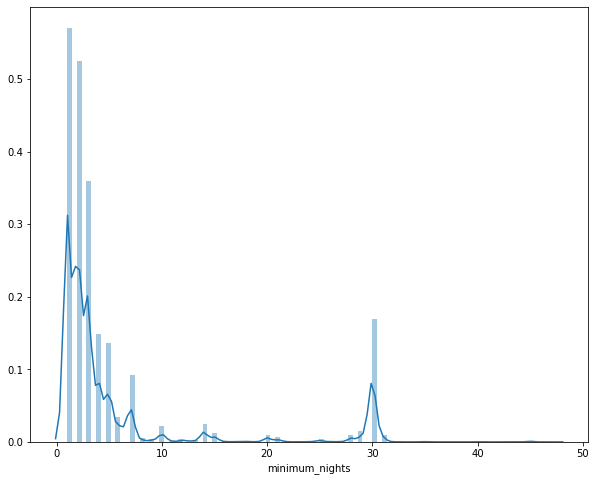

In [157]:
print(f'Number of instances greater than 50 - ',len(data[data['minimum_nights']>50]))
sns.distplot(data[data['minimum_nights']<50]['minimum_nights'], bins=100)
plt.show()

Most instances have minimum_nights less than 5, and there is another peak at 30 nights. So, few properties require you to stay atleast for a month. 

Number of instances greater than 10 -  81


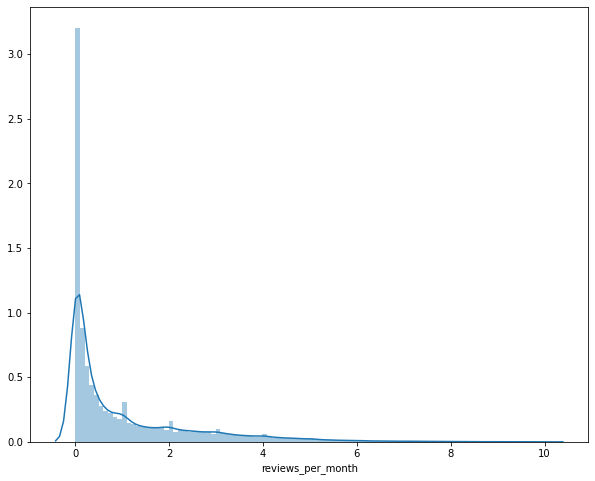

In [13]:
print(f'Number of instances greater than 10 - ',len(data[data['reviews_per_month']>10]))
sns.distplot(data[data['reviews_per_month']<10]['reviews_per_month'], bins=100)
plt.show()

In [159]:
(len(data[data['calculated_host_listings_count']==1])/len(data))*100

66.05904376112441

Number of instances greater than 1 -  16590


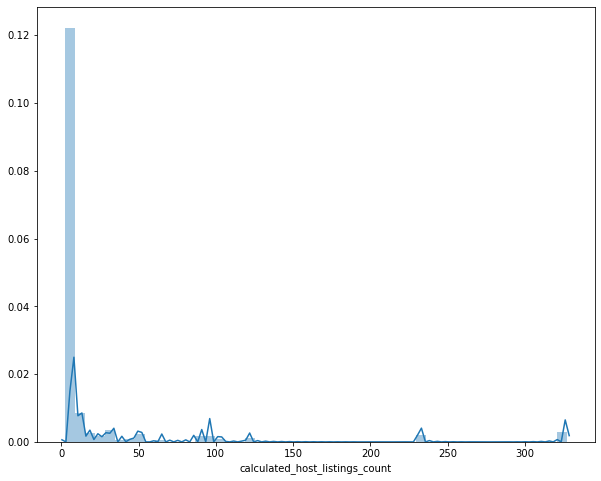

In [160]:
print(f'Number of instances greater than 1 - ',len(data[data['calculated_host_listings_count']>1]))
sns.distplot(data[data['calculated_host_listings_count']!=1]['calculated_host_listings_count'])
plt.show()

Majority of hosts are listed only once 1. So, we either take feature as two labels- 1 and greater than 1 or drop the feature based on importance later.

In [161]:
one_review = data[data['calculated_host_listings_count'] == 1]['price']
more_than_one = data[data['calculated_host_listings_count'] > 1]['price']

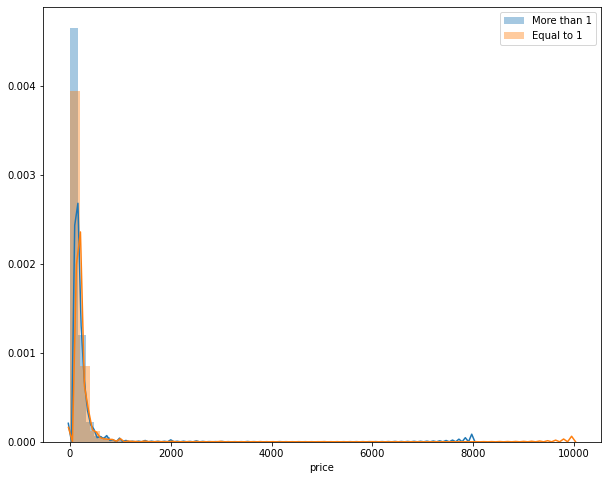

In [162]:
sns.distplot(more_than_one, label='More than 1')
sns.distplot(one_review,label='Equal to 1')
plt.legend()
plt.show()

In [163]:
for i in [one_review, more_than_one]:
    print(normaltest(i))

NormaltestResult(statistic=70886.71358186674, pvalue=0.0)
NormaltestResult(statistic=33078.82406879427, pvalue=0.0)


In [164]:
f_oneway(one_review, more_than_one)

F_onewayResult(statistic=58.71195084948171, pvalue=1.8588433307560497e-14)

p_value < 0.05, So we reject null hypothesis.
Since, each group is statistically different, this feature is useful. <br> So, we can make this numerc data to categorical by taking bins: equal to 1 and greater than 1

Number of instances greater than 100 -  2995


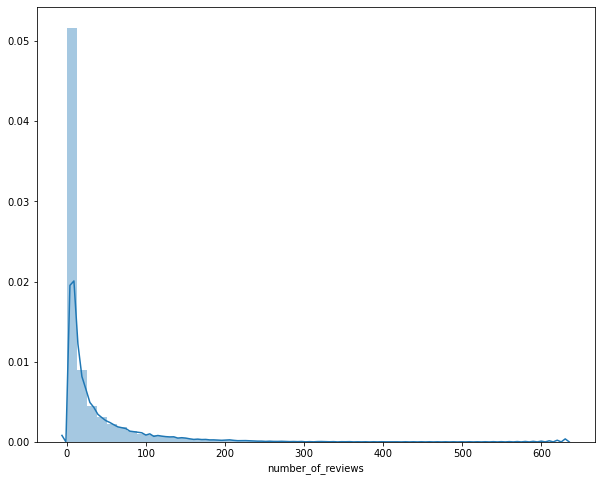

In [165]:
print(f'Number of instances greater than 100 - ',len(data[data['number_of_reviews']>100]))
sns.distplot(data['number_of_reviews'], bins=50)
plt.show()

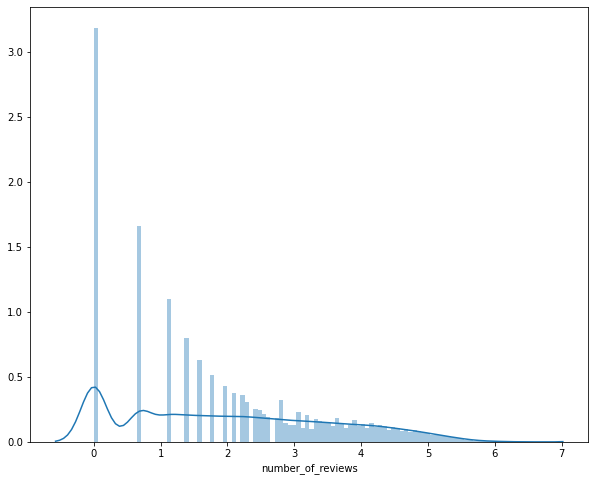

In [166]:
log_reviews = np.log((1+ data['number_of_reviews']))
sns.distplot(log_reviews, bins=100)

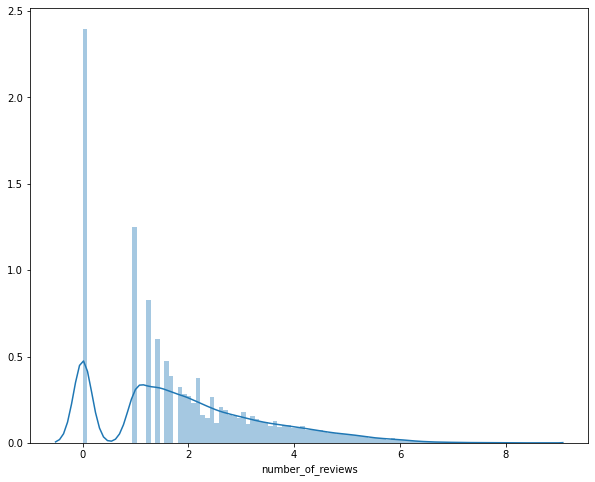

In [167]:
log_reviews = np.power(data['number_of_reviews'], (1/3))
sns.distplot(log_reviews, bins=100)

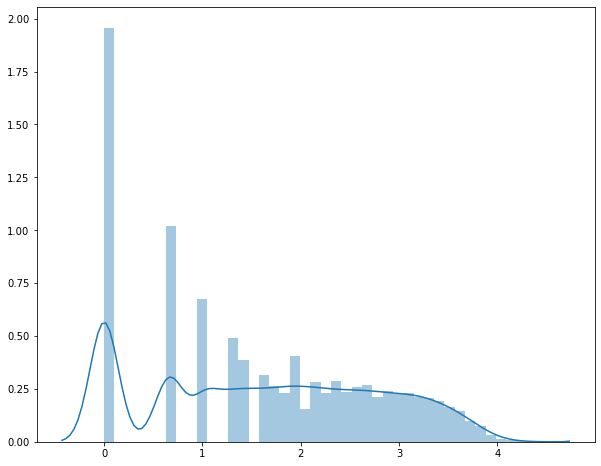

In [168]:
from scipy.stats import boxcox
l, opt_lambda = boxcox(1+data['number_of_reviews'])
reviews_boxcox = boxcox(1+data['number_of_reviews'], lmbda=opt_lambda)

sns.distplot(reviews_boxcox)

Log transform and boxcox did not help in making the distribution normal. So, we use the feature as is.

Number of instances greater than 365 -  0
Number of instances equal to 0 -  17521


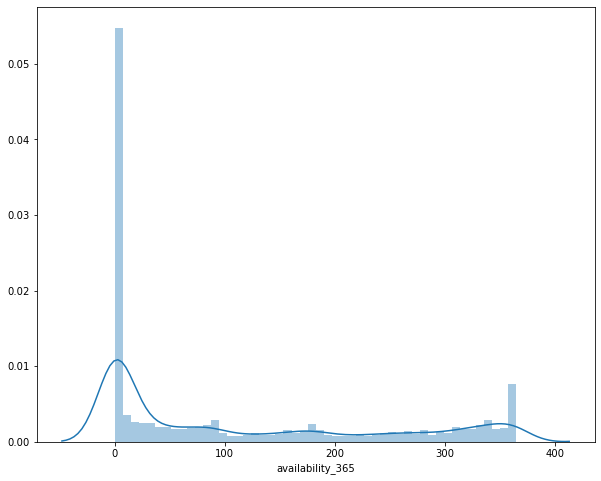

In [169]:
print(f'Number of instances greater than 365 - ',len(data[data['availability_365']>365]))
print(f'Number of instances equal to 0 - ',len(data[data['availability_365']==0]))
sns.distplot(data['availability_365'], bins=50)
plt.show()

In [170]:
data[data['availability_365']==0]['room_type'].value_counts()

Entire home/apt    8871
Private room       8354
Shared room         296
Name: room_type, dtype: int64

There are two peaks: 0-properties are probably popular and are not available that easily, 365- they are available throughout the year. 

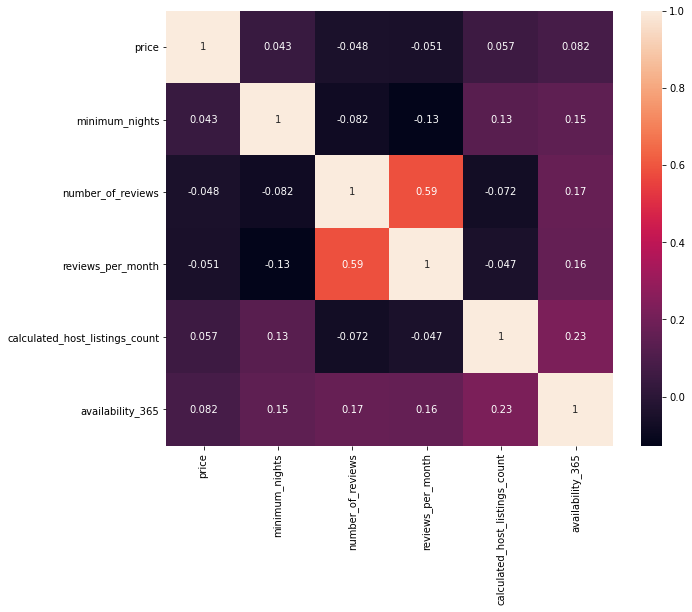

In [171]:
sns.heatmap(data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count'\
                 ,'availability_365']].corr(), annot=True)
plt.show()

reviews_per_month and number_of_reviews has high correlation, which is kind of expected. So, it is beeter to keep only one of them. 'reviews_per_month' feature has more than half of its values less than 1, and its difficult to interpret that way. So, we drop this feature.

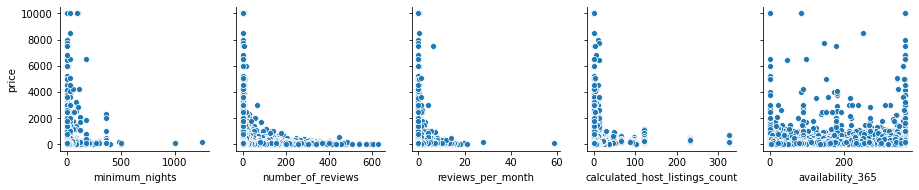

In [172]:
sns.pairplot(y_vars=['price'], x_vars=['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count'\
                 ,'availability_365'], data=data)
plt.show()

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
sample_data = data[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
vif = pd.DataFrame()
vif['feature'] = sample_data.columns

vif["VIF"] = [variance_inflation_factor(sample_data.values, i) for i in range(len(sample_data.columns))] 
vif

,feature,VIF
0,minimum_nights,1.131256
1,number_of_reviews,1.974341
2,reviews_per_month,2.085544
3,calculated_host_listings_count,1.126402
4,availability_365,1.570339


There is not much correlation between price and other numeric features. And VIF did not show any feature that is collinear. 

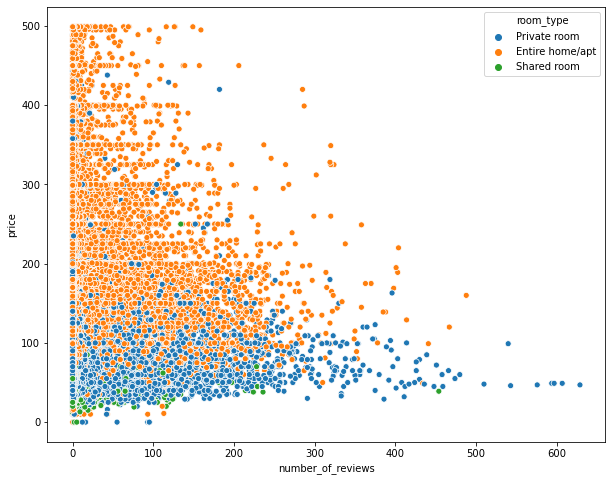

In [174]:
sample_data = data[data['price']<500]
sns.scatterplot(x='number_of_reviews',y='price', data=sample_data, hue='room_type')

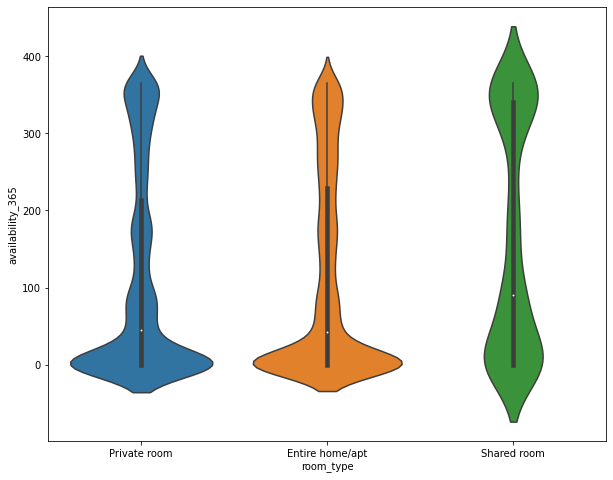

In [175]:
sns.violinplot(x='room_type',y='availability_365', data=data)

Most room_type's are available for less than 30 days and there is another spike around 365 days. <br>
Shared rooms has more availability for around 365 days than other room types.

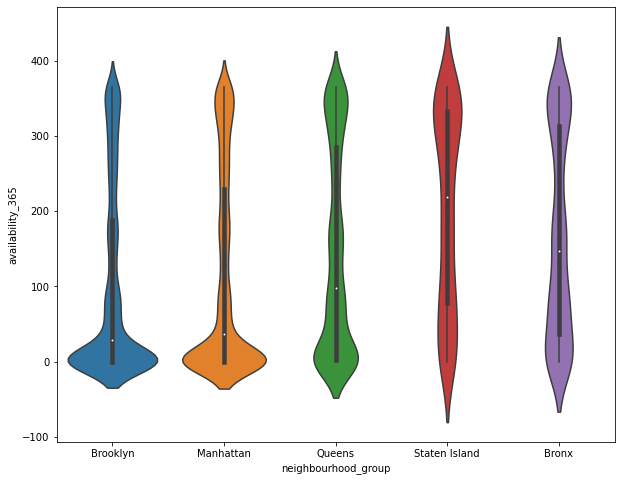

In [176]:
sns.violinplot(x='neighbourhood_group',y='availability_365', data=data)

Staten island has more availability followed by Bronx in a year. This is expected as manhattan and brooklyn has more population and has tourist spots.

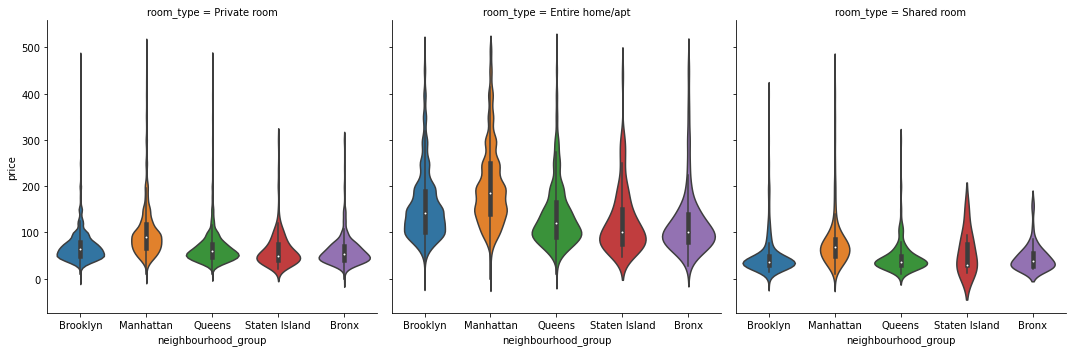

In [177]:
sample_data = data[data['price']<500]
sns.catplot(x='neighbourhood_group', y='price',col='room_type', kind='violin', data=sample_data);
plt.show()

Manhattan has highest prices in all room types followed by Brooklyn

In [14]:
data.drop(['host_id','neighbourhood','latitude','longitude','reviews_per_month'], axis=1, inplace = True)

In [15]:
data['calculated_host_listings_count'] = np.where((data['calculated_host_listings_count']==1), 0, 1)

In [16]:
quantiles_data = [0,0.25,0.5,0.75,1]
data['number_of_reviews'].quantile(quantiles_data)

0.00      0.0
0.25      1.0
0.50      5.0
0.75     24.0
1.00    629.0
Name: number_of_reviews, dtype: float64

In [17]:
labels = [1,2,3,4]
data['number_of_reviews_range'] = pd.qcut(data['number_of_reviews'], q=quantiles_data, labels=labels)
data.drop(['number_of_reviews'], axis=1, inplace=True)

In [18]:
data = pd.get_dummies(data, columns=['neighbourhood_group','room_type','number_of_reviews_range'], drop_first=True)

In [19]:
data.head(2)

,name,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,number_of_reviews_range_2,number_of_reviews_range_3,number_of_reviews_range_4
0,Clean & quiet apt home by the park,149,1,1,365,1,0,0,0,1,0,0,1,0
1,Skylit Midtown Castle,225,1,1,355,0,1,0,0,0,0,0,0,1


In [20]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data[['price']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [21]:
print(x_train.shape, '----', x_test.shape)
print(y_train.shape, '----', y_test.shape)

(32748, 13) ---- (16131, 13)
(32748, 1) ---- (16131, 1)


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, vstack

In [23]:
model_vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=500)
model_vectorizer.fit(x_train['name'].values)

X_train_name = model_vectorizer.transform(x_train['name'].values)
X_test_name = model_vectorizer.transform(x_test['name'].values)

In [24]:
from sklearn.preprocessing import Normalizer

model_normalizer = Normalizer()
model_normalizer.fit(x_train['availability_365'].values.reshape(1,-1))

x_train_availability = model_normalizer.transform(x_train['availability_365'].values.reshape(1,-1)).reshape(-1,1)
x_test_availability  = model_normalizer.transform(x_test['availability_365'].values.reshape(1,-1)).reshape(-1,1)

In [25]:
model_normalizer = Normalizer()
model_normalizer.fit(x_train['minimum_nights'].values.reshape(1,-1))

x_train_min_nights = model_normalizer.transform(x_train['minimum_nights'].values.reshape(1,-1)).reshape(-1,1)
x_test_min_nights  = model_normalizer.transform(x_test['minimum_nights'].values.reshape(1,-1)).reshape(-1,1)

In [26]:
x_train = x_train.drop(['name','minimum_nights','availability_365'], axis=1)
x_test = x_test.drop(['name','minimum_nights','availability_365'], axis=1)

In [27]:
x_tr = hstack((x_train, X_train_name, x_train_availability,x_train_min_nights)).tocsr()
x_te = hstack((x_test, X_test_name, x_test_availability, x_test_min_nights)).tocsr()

In [28]:
print(x_tr.shape,'---',x_te.shape)

(32748, 512) --- (16131, 512)


In [29]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_tr, y_train)

y_train_pred = model_lr.predict(x_tr)
rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(rmse_lr)

207.55965137284448


In [49]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_tr, y_train) 

Lasso(alpha=0.01)

In [51]:
model_lasso.score(x_tr, y_train)

0.1717552749845258

In [50]:
y_test_pred = model_lasso.predict(x_te)
np.sqrt(mean_squared_error(y_test,y_test_pred))

249.0486725771878

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

model_svr = SVR()
param = {'kernel':['linear', 'rbf'], 'C':[0.0001,0.001,0.01,0.1,1,5,10], 'epsilon':[0.001,0.01,0.1,0,1,2,5]}
model_search_svr = RandomizedSearchCV(model_svr, param, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, return_train_score=True)

model_search_svr.fit(x_tr, y_train)
results = pd.DataFrame.from_dict(model_search_svr.cv_results_)
#results = results.sort_values(by=['param_min_samples_split','param_max_depth'])

In [31]:
model_search_svr.best_estimator_

SVR(C=10, epsilon=2)

In [32]:
best_svr = SVR(C=10, epsilon=0)
best_svr.fit(x_tr, y_train)

y_train_pred = best_svr.predict(x_tr)
rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(rmse_lr)

214.94539016392972


In [33]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
param = {'max_depth':[1,2,5,10,50], 'min_samples_split':[5,10,50,100,200]}
model_search_dt = GridSearchCV(model_dt, param, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, return_train_score=True)

model_search_dt.fit(x_tr, y_train)
results_dt = pd.DataFrame.from_dict(model_search_dt.cv_results_)

In [34]:
model_search_dt.best_estimator_

DecisionTreeRegressor(max_depth=1, min_samples_split=5)

In [35]:
    best_dt = DecisionTreeRegressor(max_depth=1, min_samples_split=5)
    best_dt.fit(x_tr, y_train)

    y_train_pred = best_dt.predict(x_tr)
rmse_dt = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(rmse_dt)

220.72658381417142


In [36]:
y_test_pred = best_dt.predict(x_te)
np.sqrt(mean_squared_error(y_test,y_test_pred))

256.53875703961967

In [37]:
from sklearn.ensemble import ExtraTreesRegressor

model_extraTrees = ExtraTreesRegressor()
params = {'n_estimators':[5,10,20,40,60], 'max_depth':[1,2,5,10,50], 'min_samples_split':[5,10,50,100,200]}
model_search_extraTrees = RandomizedSearchCV(model_extraTrees, params, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, return_train_score=True)

model_search_extraTrees.fit(x_tr, y_train)

print(model_search_extraTrees.best_estimator_)

ExtraTreesRegressor(max_depth=5, min_samples_split=50, n_estimators=5)


In [38]:
best_model_extraTrees = ExtraTreesRegressor(n_estimators=60, max_depth=50, min_samples_split=100)
best_model_extraTrees.fit(x_tr, y_train)

y_train_pred = best_model_extraTrees.predict(x_tr)
rmse_extras = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(rmse_extras)

161.7217673714064


In [43]:
y_test_pred = best_model_extraTrees.predict(x_te)
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

253.59795815193488


In [45]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
params = {'n_estimators':[20,50,100,150,200],'learning_rate ':[0.00001, 0.0001,0.001,0.01,0.1,1,5,10], 'max_depth':[1,5,10,40,60]}
model_xgbReg = RandomizedSearchCV(xgb_model,param_distributions=params,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5, random_state=45, return_train_score=True)

model_xgbReg.fit(x_tr, y_train)
print(model_xgbReg.best_estimator_)

[08:16:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learning_rate  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, learning_rate =0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [46]:
xgb_model = xgb.XGBRegressor(n_estimators=20, learning_rate=0.01, max_depth=5)
xgb_model.fit(x_tr, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_test_pred = xgb_model.predict(x_te)
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

286.06809945986856


Out of all above models, extraTrees model has the least rmse score.

In [66]:
x_total = vstack((x_tr, x_te)).tocsr()

In [100]:
y_total = pd.concat([y_train, y_test])

In [101]:
y_test_pred = best_model_extraTrees.predict(x_total)
print(np.sqrt(mean_squared_error(y_total,y_test_pred)))

196.8420539136564


In [115]:
df_test = pd.DataFrame(y_test_pred, index=y_total.index, columns=['price'])
df_test.head()

,price
43108,67.732849
24874,89.440667
37124,74.810029
39168,60.114161
35993,63.818911


In [116]:
df_test.index.name = 'id'

In [117]:
df_test.head()

,price
id,
43108,67.732849
24874,89.440667
37124,74.810029
39168,60.114161
35993,63.818911


In [118]:
da = df_test.to_csv('test_results_nyc.csv')
da

In [119]:
print(da)

None
